In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import re
from google.colab import files
import seaborn as sns

In [20]:
# Allow file upload
uploaded = files.upload()

Saving Scatter_plot.xlsx to Scatter_plot (1).xlsx


In [21]:
# STEP 3: Load data
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, sheet_name='Sheet1')

In [22]:
df


,Gene Name,HNOX_1,HNOX_2,HNOX_3,WT_1,WT_2,WT_3
0,Pden_0444,0.0,0.0,0.0,15861000.0,15839000.0,15009000.0
1,ppk,0.0,0.0,0.0,2335300.0,2519400.0,2585500.0
2,Pden_4022,0.0,0.0,0.0,4163000.0,4203200.0,3781000.0
3,Pden_4104,0.0,0.0,0.0,4776700.0,5177700.0,4477700.0
4,Pden_0682,0.0,0.0,0.0,2232800.0,1855500.0,2098100.0
...,...,...,...,...,...,...,...
1753,Pden_5055,0.0,0.0,0.0,0.0,0.0,0.0
1754,Pden_5103,0.0,0.0,0.0,0.0,0.0,0.0
1755,Pden_5116,0.0,0.0,0.0,0.0,0.0,0.0
1756,Pden_5123,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Calculate mean for WT and DM replicates
df['WT_Mean'] = df[['WT_1', 'WT_2', 'WT_3']].mean(axis=1)
df['HNOX_Mean'] = df[['HNOX_1', 'HNOX_2', 'HNOX_3']].mean(axis=1)

In [24]:
# Calculate log2 fold-change
df['Log2_FC'] = np.log2(df['HNOX_Mean'] / df['WT_Mean'].replace(0, np.nan))

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Log2_FC'])

In [26]:
# Sort by Log2_FC to find upregulated and downregulated genes
df_sorted = df_cleaned.sort_values(by='Log2_FC', ascending=True)

# Get top 10 downregulated genes
downregulated_genes = df_sorted.head(10)

# Get top 10 upregulated genes
upregulated_genes = df_sorted.tail(10)

# Combine for plotting
plot_df = pd.concat([downregulated_genes, upregulated_genes])

/tmp/ipython-input-2991413443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Log2_FC', y='Gene Name', data=plot_df, palette='viridis')


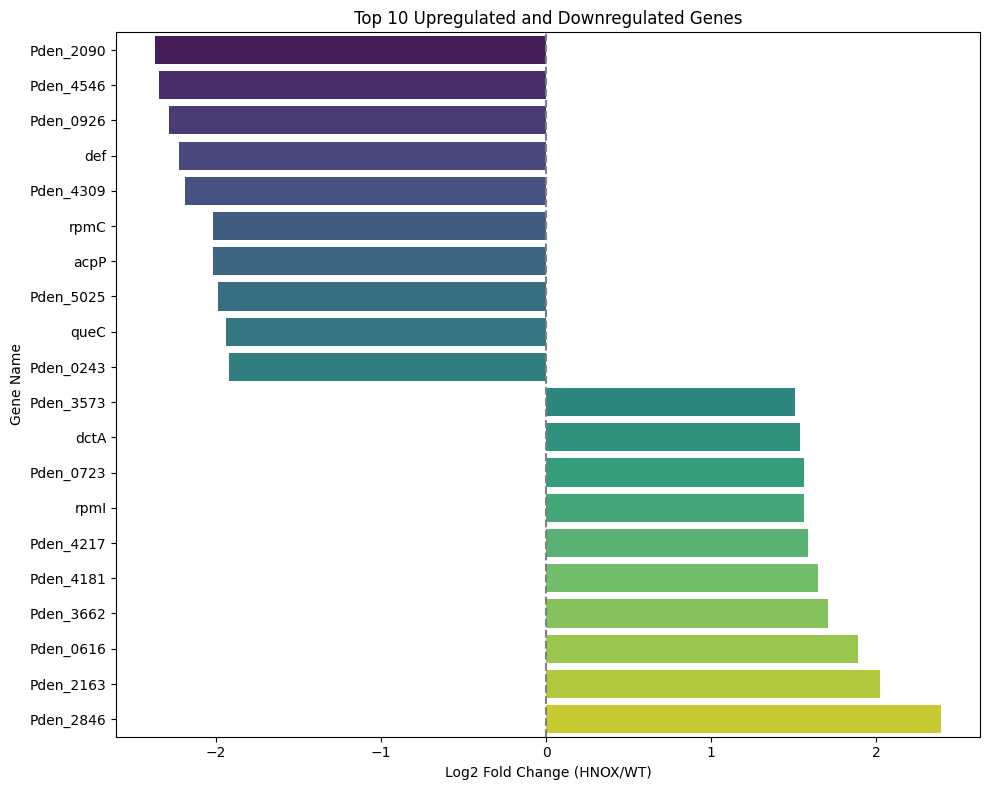

In [27]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Log2_FC', y='Gene Name', data=plot_df, palette='viridis')
plt.title('Top 10 Upregulated and Downregulated Genes')
plt.xlabel('Log2 Fold Change (HNOX/WT)')
plt.ylabel('Gene Name')
plt.axvline(x=0, color='grey', linestyle='--') # Add a line at 0 for reference
plt.tight_layout()
plt.show()